In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
mpl.rcParams['lines.linewidth'] = 2
import scipy.stats as st
from sci_analysis import analyze
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 


## 데이터 불러오기 및 기본적인 전처리(구매금액 생성, 날짜 생성, 등)

In [4]:
df=pd.read_csv('total_dataset.csv')
test=df[:100000]
test['PD_BUY_AM']=test['PD_BUY_AM'].apply(lambda x: x.replace(',',''))
test['PD_BUY_AM']=test['PD_BUY_AM'].apply(lambda x: x.replace('nan','0'))
test['PD_BUY_AM']=test['PD_BUY_AM'].astype('int')
test['Sales']=test['PD_BUY_AM']*test['PD_BUY_CT']
test['SESS_DT']=test['SESS_DT'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))
test['SESS_DT_period'] = test.SESS_DT.apply(lambda x: x[:7])
test.SESS_DT=pd.DatetimeIndex(test.SESS_DT)
test['day']=pd.DatetimeIndex(test.SESS_DT).day
test['week']=pd.DatetimeIndex(test.SESS_DT).week
test['dayofweek']=pd.DatetimeIndex(test.SESS_DT).dayofweek
test['quarter']=pd.DatetimeIndex(test.SESS_DT).quarter
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].apply(lambda x: str(x))
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].apply(lambda x: x.replace(',',''))
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].apply(lambda x: x.replace('nan','0'))
test['TOT_SESS_HR_V']=test['TOT_SESS_HR_V'].astype('int')

## 통계검정을 통해 집단간의 판매량 차이가 있는지 확인할 수 있다.
- 검정에는 가정의 제약 자유로운 비모수 검정을 이용하였습니다.
- 집단간의 평균과 분산의 차이를 분석하였습니다.
- 이 두 지표를 기준으로 pvalue가 낮아서 차이가 있음을 증명하여 통계적 의미를 갖을 수 있습니다.

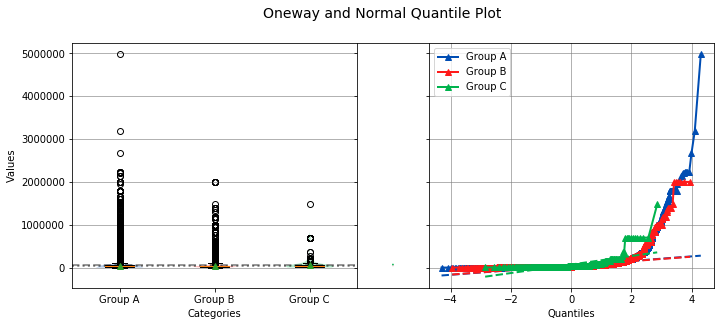



Overall Statistics
------------------

Number of Groups =  3
Total            =  100000
Grand Mean       =  54302.2027
Pooled Std Dev   =  91954.2795
Grand Median     =  28000.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
82021          46632.0026    92383.1571    100.0000      28000.0000    4984000.0000 Group A       
17657          44920.6305    88402.6330    470.0000      25600.0000    2000000.0000 Group B       
322            71353.9752    153258.3776   3000.0000     29000.0000    1476010.0000 Group C       


Levene Test
-----------

alpha   =  0.0500
W value =  14.7335
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  38.2015
p value =  0.0000

HA: Group means are not matched



In [5]:
analyze({"Group A": test.loc[test['DVC_CTG_NM']=='mobile','Sales'], 
         "Group B": test.loc[test['DVC_CTG_NM']=='desktop','Sales'], 
         "Group C": test.loc[test['DVC_CTG_NM']=='tablet','Sales']})

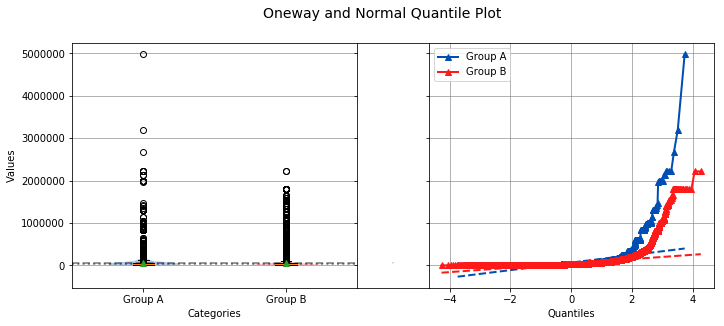



Overall Statistics
------------------

Number of Groups =  2
Total            =  79208
Grand Mean       =  55467.1036
Pooled Std Dev   =  94299.3707
Grand Median     =  29000.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
7551           65500.0344    162129.7050   240.0000      30000.0000    4984000.0000 Group A       
71657          45434.1728    84021.9949    100.0000      28000.0000    2217200.0000 Group B       


Levene Test
-----------

alpha   =  0.0500
W value =  293.1105
p value =  0.0000

HA: Variances are not equal



Mann Whitney U Test
-------------------

alpha   =  0.0500
u value =  290021929.5000
p value =  0.0000

HA: Locations are not matched



In [4]:
# 성별에 따른 구매금액의 차이 검정
analyze({"Group A": test.loc[test['CLNT_GENDER']=='M','Sales'], 
         "Group B": test.loc[test['CLNT_GENDER']=='F','Sales']})

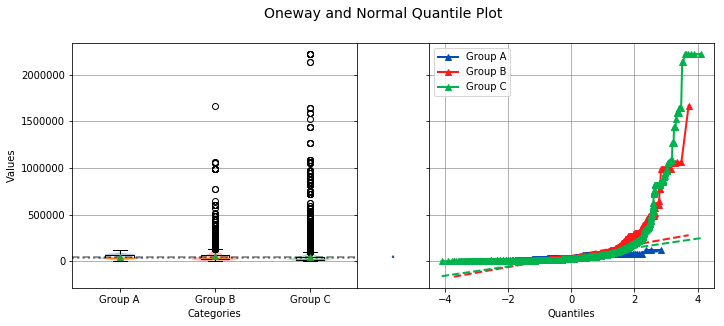



Overall Statistics
------------------

Number of Groups =  3
Total            =  41949
Grand Mean       =  48727.7377
Pooled Std Dev   =  83417.1042
Grand Median     =  34900.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
296            46042.9392    22828.8764    7500.0000     37000.0000    120000.0000  Group A       
6925           56617.4787    84198.9297    100.0000      34900.0000    1669000.0000 Group B       
34728          43522.7952    83588.0861    200.0000      25600.0000    2220000.0000 Group C       


Levene Test
-----------

alpha   =  0.0500
W value =  27.2904
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  620.6690
p value =  0.0000

HA: Group means are not matched



In [5]:
# 나이(젊은층)에 따른 구매 금액의 차이 검정
analyze({"Group A": test.loc[test['CLNT_AGE']==10,'Sales'], 
         "Group B": test.loc[test['CLNT_AGE']==20,'Sales'], 
         "Group C": test.loc[test['CLNT_AGE']==30,'Sales']})

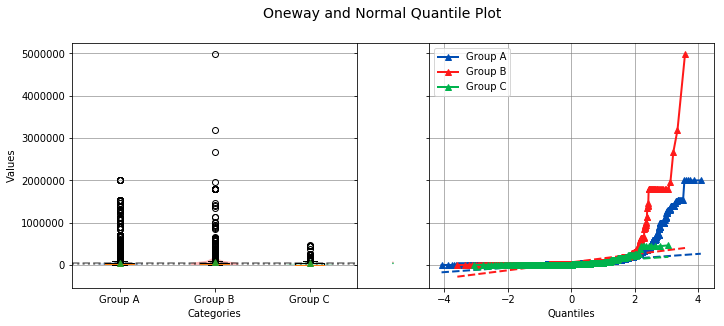



Overall Statistics
------------------

Number of Groups =  3
Total            =  37243
Grand Mean       =  50315.6358
Pooled Std Dev   =  105291.0338
Grand Median     =  27500.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
32357          47446.7361    87618.6747    300.0000      28000.0000    2000000.0000 Group A       
4243           63993.3750    195045.7915   600.0000      27500.0000    4984000.0000 Group B       
643            39506.7963    69199.7814    3900.0000     12000.0000    465000.0000  Group C       


Levene Test
-----------

alpha   =  0.0500
W value =  55.6869
p value =  0.0000

HA: Variances are not equal



Kruskal-Wallis
--------------

alpha   =  0.0500
h value =  133.7715
p value =  0.0000

HA: Group means are not matched



In [6]:
# 나이(노년층)에 따른 구매 금액의 차이 검정
analyze({"Group A": test.loc[test['CLNT_AGE']==40,'Sales'], 
         "Group B": test.loc[test['CLNT_AGE']==50,'Sales'], 
         "Group C": test.loc[test['CLNT_AGE']==60,'Sales']})

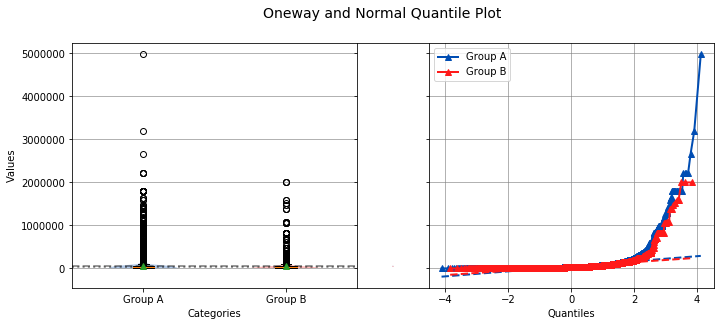



Overall Statistics
------------------

Number of Groups =  2
Total            =  47176
Grand Mean       =  47473.6128
Pooled Std Dev   =  97982.2015
Grand Median     =  28500.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
35849          49516.0126    102415.2420   240.0000      29000.0000    4984000.0000 Group A       
11327          45431.2130    82393.7251    450.0000      28000.0000    2000000.0000 Group B       


Levene Test
-----------

alpha   =  0.0500
W value =  13.6391
p value =  0.0002

HA: Variances are not equal



Mann Whitney U Test
-------------------

alpha   =  0.0500
u value =  206042000.5000
p value =  0.0172

HA: Locations are not matched



In [7]:
# 지역에 따른 구매 금액의 차이 검정 - 서울과 부산
analyze({"Group A": test.loc[test['ZON_NM']=='Seoul','Sales'], 
         "Group B": test.loc[test['ZON_NM']=='Busan','Sales']})

1. 모든 네 종류의 분석에서 평균과 분산이 다른 것을 확인하였습니다.
2. 이 결과는 구매 금액에 있어서 성별,나이,지역이 다른 행동 패턴을 보이며 발생하고 있다는 것입니다.